In [9]:
import pathlib
import numpy as np
import tifffile
import matplotlib.pyplot as plt
import scipy
from skimage.filters import threshold_otsu

def convert_images(directory):
    input_path = pathlib.Path(directory)
    images = {}

    for file_path in input_path.glob('*.tif'):
        try:
            # Load the TIFF file into a numpy array
            image = tifffile.imread(file_path)

            # standardize image dimensions
            with tifffile.TiffFile(file_path) as tif_file:
                metadata = tif_file.imagej_metadata
            num_channels = metadata.get('channels', 1)
            image = image.reshape(num_channels, 
                                    image.shape[-2],  # rows
                                    image.shape[-1])  # cols
            
            filtered_image = scipy.ndimage.gaussian_filter(image, sigma = 2.0)
            
            images[file_path.name] = filtered_image
                        
        except tifffile.TiffFileError:
            print(f"Warning: Skipping '{file_path.name}', not a valid TIF file.")

    # Sort the dictionary keys alphabetically
    images = {key: images[key] for key in sorted(images)}

    return images       

images = convert_images('/Users/domchom/Desktop/cell_profiler_test/CP_PatternAnalysis/kymograph_testing/single_kymographs')

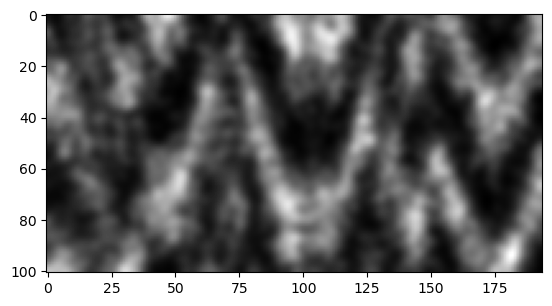

23252.77889999997
19353.92568813604
16086.944444444409
13639.215433633311
12914.112999791752
12196.973827160487
11765.535217285156
11321.733959123987
10911.843516613313
11060.934078160877
12089.807225000011
12621.187005414453
12750.753090635902
12577.545248909235
12380.388888888832
11822.128706559997
11251.80508385563
10387.092749712596
9496.541467097086
8553.129989353562
7576.965353086402
6560.9117605338615
5544.001194000244
4608.639646317079
4514.4367973324115
4477.028671386923
4439.470849884727
4416.986422191046
4393.554005110456
4346.586361182321
4328.696599999994
4421.537989235498
4459.15721330101
4550.987315728522
4566.252616528489
4625.02735558606
4642.837212917333
4654.681175265359
4663.582838270408
4713.575067378737
4711.923639039987
4738.254204716162
4713.106430096954
4702.583854140179
4651.855614616661
4608.808831746481
4551.575198057959
4497.054069055117
4458.797442600624
4429.581449789264
4405.327544444408
4378.1803678086435
4352.520383605262
4322.886797218633
4288.6944631

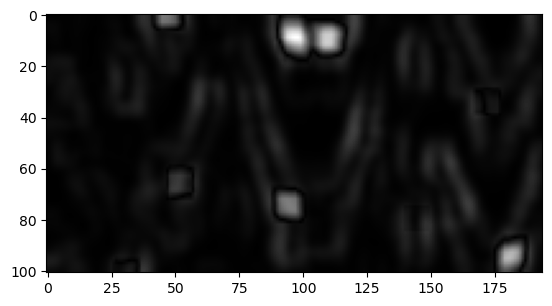

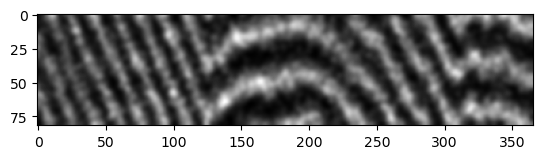

4631.423599999982
4834.991735537207
4860.4843750000055
4875.8583382934685
4844.679378384024
4832.071111111105
5015.695297241211
5077.040887920401
5134.156712010366
5134.859262897011
5069.6924937500025
4998.4541420498645
4944.185758315692
4876.812854442345
4794.661844135808
4727.648245760004
4629.968565088753
4536.582751424885
4419.546645603389
4307.179548156952
4162.028161728396
4021.0462544977336
3941.6747436523438
3906.8425502204645
3851.993561499503
3798.9707648479725
3736.493046029578
3667.5436635379847
3649.174613070799
3698.8226913934877
3725.9830859375124
3718.0415619013893
3702.9353960027065
3665.679826933482
3616.4881665250914
3562.084283249501
3503.264951347379
3446.4884823413668
3392.9279031635724
3344.0525568879148
3302.8416913599985
3264.4304785622744
3289.460343513674
3304.0930346324903
3311.346205293714
3313.5552434942956
3303.375403477724
3289.9655763579385
3270.8511196398713
3250.9248406480656
3231.2941659722246
3215.6157818076954
3203.750975546298
3192.5951137694137
3

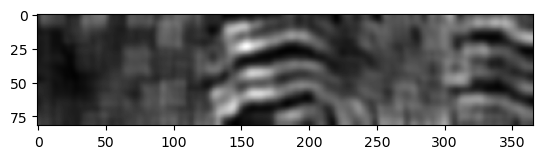

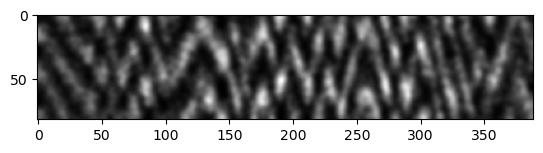

26937.460400000036
21341.904651321664
17095.569637345732
13446.959980392858
10497.435235318611
8335.532760493817
6649.552383422852
6129.1986685983065
6179.074074074055
6034.329049040483
5934.182400000012
6013.0259099860905
6047.503790724682
6020.3834677549075
5921.580246913582
5765.651584000003
5614.892099366241
5430.9407478911
5256.028920241553
5100.845333043015
4990.0264888888705
4925.488999167319
4891.655239105225
4845.958988836518
4787.769842315106
4724.208743690132
4713.157405025919
4727.953323113647
4726.300108961725
4710.233953664698
4680.597293359364
4637.419568746258
4582.0772389076565
4515.770494392628
4440.214843749998
4367.012758786788
4322.109620061045
4273.009346717545
4219.341423128873
4162.254801163124
4106.780667359997
4060.703148361741
4025.2809052061693
3997.1084018832353
3969.652341934472
3956.6824808141446
3947.2652345376864
3959.5331711317685
4000.8430977221124
3990.7976664225844
3976.577654320996
3943.8087026999547
3905.985239845644
3855.5335019238664
3805.054551

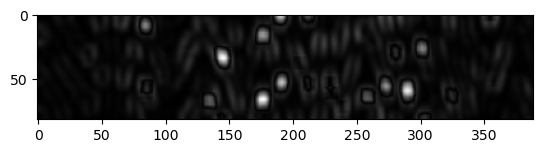

In [32]:
def reg_variance_transform(image_array, win_low, win_high, range_check, window):

    size = window

    if range_check:
        window_range = range(win_low,win_high,1)
        max_variance = -1
        size = -1

        for window in window_range:
            result = abs(scipy.ndimage.uniform_filter(image_array**2, size=window, output=np.float64) - 
                        (scipy.ndimage.uniform_filter(image_array, size=window, output=np.float64)**2))
            variance = result.max()
            print(variance)
            if variance > max_variance:
                max_variance = variance
                size = window
    
    output_image_array = abs(scipy.ndimage.uniform_filter(image_array**2, size=size, output=np.float64) 
                        - (scipy.ndimage.uniform_filter(image_array, size=size, output=np.float64)**2))

    return output_image_array, size

for image in images:
    img = images[image]
    plt.imshow(img[0], cmap='gray')
    plt.show()

    variance_image, size = reg_variance_transform(img, 10, 100, True, 5)
    print(f'variance size: {size}')
    plt.imshow(variance_image[0], cmap='gray')
    plt.show()

    '''variance_again_image, size = reg_variance_transform(variance_image, 5, 50, True, 6)
    print(f'variance size: {size}')
    plt.imshow(variance_again_image[0], cmap='gray')
    plt.show()'''
    

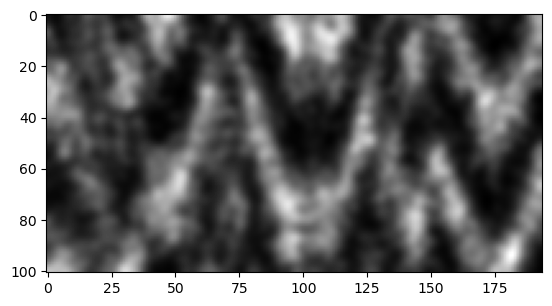

variance size: 5


/Users/domchom/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/domchom/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


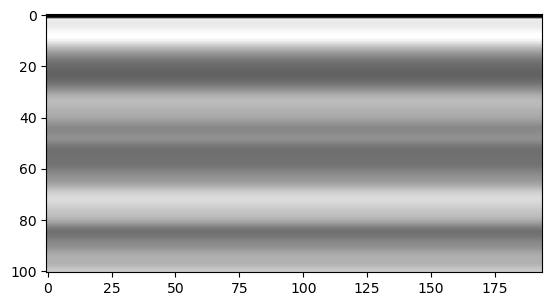

variance size: 5


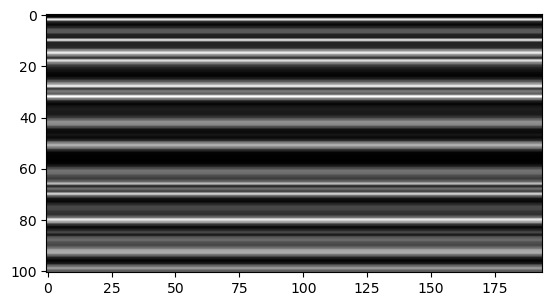

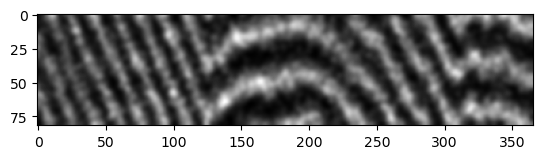

variance size: 5


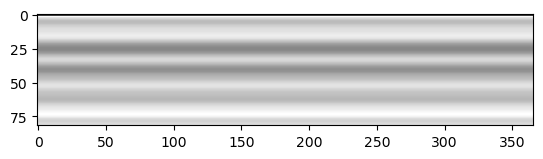

variance size: 5


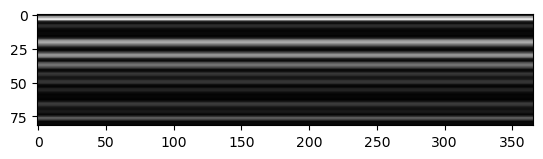

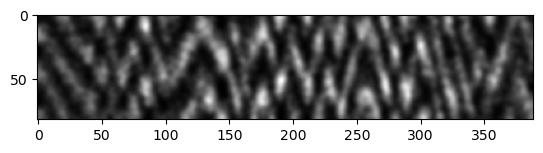

variance size: 5


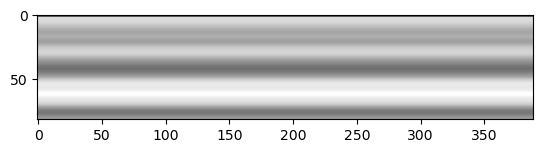

variance size: 5


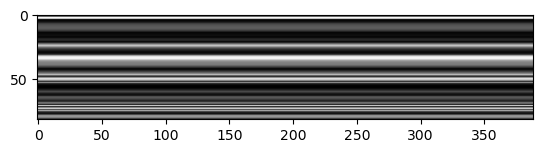

In [20]:
def linear_variance_transform(image_array, win_low, win_high, range_check, window):
    '''this version does not go column by column. It finds the variance of all columns together'''

    num_cols = image_array.shape[-1]
    num_rows = image_array.shape[-2]

    size = window

    if range_check:
        window_range = range(win_low,win_high,1)
        max_variance = -1
        size = -1
        for window in window_range:
            window_xtra = int((window - 1) / 2)
            results_list = []
            for row_num in range(0, num_rows):
                row_values = image_array[:, row_num - window_xtra:row_num + window_xtra, :]
                mean = np.mean(row_values)
                result = np.mean((row_values - mean) ** 2)

                # print(f'row_num {row_num}')
                # print(f'mean {mean}')
                # print(f'result {result}')

                results_list.append(result)

            variance = max(results_list)
            if variance > max_variance:
                max_variance = variance
                size = window

    variance_image = np.zeros_like(image_array)
    size_xtra = int((size - 1) / 2)

    for row_num in range(0, num_rows):
        row_values = image_array[:, row_num - size_xtra:row_num + size_xtra, :]
        mean = np.mean(row_values)
        result = np.mean((row_values - mean) ** 2)
        variance_image[:, row_num, :] = result
    
    return variance_image, size

for image in images:
    plt.imshow(images[image][0], cmap='gray')
    plt.show()

    variance_image, size = linear_variance_transform(images[image], 1, 5, False, 5)
    print(f'variance size: {size}')
    plt.imshow(variance_image[0], cmap='gray')
    plt.show()

    variance_again_image, size = linear_variance_transform(variance_image, 1, 5, False, 5)
    print(f'variance size: {size}')
    plt.imshow(variance_again_image[0], cmap='gray')
    plt.show()

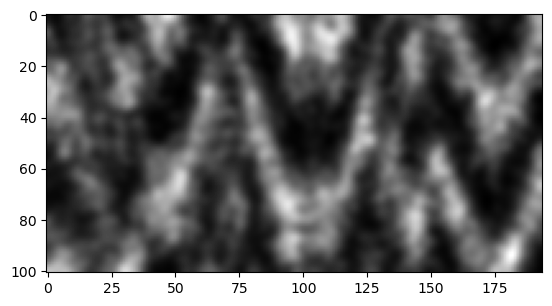

variance size: 36


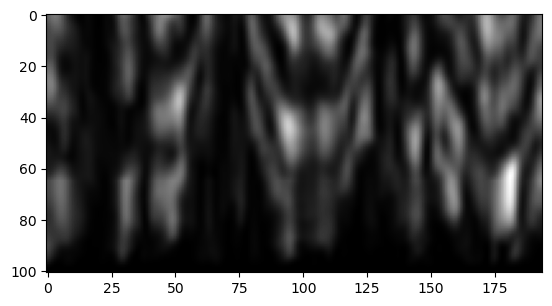

________________________________________________________________________________________________________________


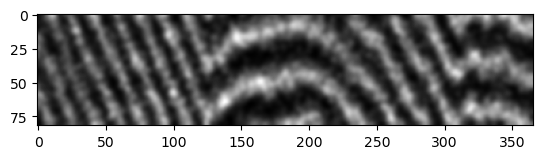

variance size: 21


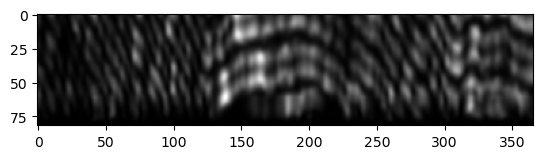

________________________________________________________________________________________________________________


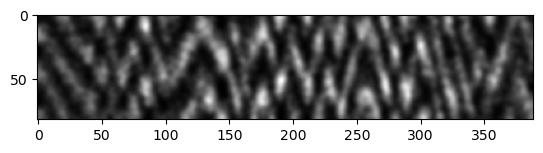

variance size: 34


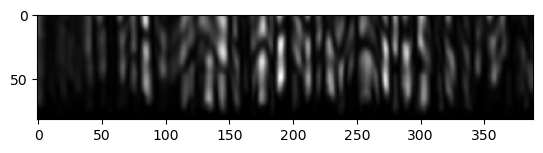

________________________________________________________________________________________________________________


In [26]:
def linear_variance_transform_col(image_array, win_low, win_high, range_check, window):

    num_cols = image_array.shape[-1]
    num_rows = image_array.shape[-2]

    size = window

    if range_check:
        window_range = range(win_low,win_high,1)
        max_variance = -1
        size = -1
        for window in window_range:
            results_list = []
            for col_num in range(num_cols):
                row_results = []
                for row_num in range(num_rows):
                    row_values = image_array[:, row_num:row_num + window, col_num]
                    mean = np.mean(row_values)
                    result = np.mean((row_values - mean) ** 2)

                    row_results.append(result)
                results_list.append(row_results)

            variance = max(max(inner_list) for inner_list in results_list)
            if variance > max_variance:
                max_variance = variance
                size = window

    variance_image = np.zeros_like(image_array)
    for col_num in range(num_cols):
        for row_num in range(0, num_rows):
            row_values = image_array[:, row_num:row_num+size, col_num]
            mean = np.mean(row_values)
            result = np.mean((row_values - mean) ** 2)
            variance_image[:, row_num, col_num] = result
    return variance_image, size

def rescale_image(image_array):
    min_val = np.min(image_array)
    max_val = np.max(image_array)
    scaled_array = (image_array - min_val) / (max_val - min_val)
    return scaled_array

for image in images:
    img = images[image]
    plt.imshow(img[0], cmap='gray')
    plt.show()

    variance_image, size = linear_variance_transform_col(images[image], 5, 50, True, 5)
    print(f'variance size: {size}')
    plt.imshow(variance_image[0], cmap='gray')
    plt.show()

    print("________________________________________________________________________________________________________________")

    '''variance_again_image, size = linear_variance_transform_col(variance_image, 3, 10, True, 5)
    print(f'variance size: {size}')
    plt.imshow(variance_again_image[0], cmap='gray')
    plt.show()'''